In [1]:
import numpy as np
import scipy.signal
import skimage.data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import scipy.signal
import skimage.data
import matplotlib.pyplot as plt
%matplotlib inline
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')
    else:
        # Color image.
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

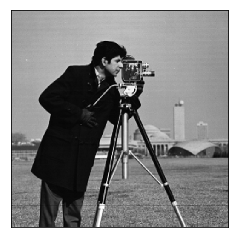

In [3]:
im = skimage.data.camera()
disp_image(im)

In [5]:
print("The image size is "+str(im.shape))

The image size is (512, 512)


In [30]:
Gx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])  # Gradient operator in the x-direction
Gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])  # Gradient operator in the y-direction

In [8]:
Gxflip = np.fliplr(np.flipud(Gx))
Gyflip = np.fliplr(np.flipud(Gy))

Text(0.5,1,'Gy * image')

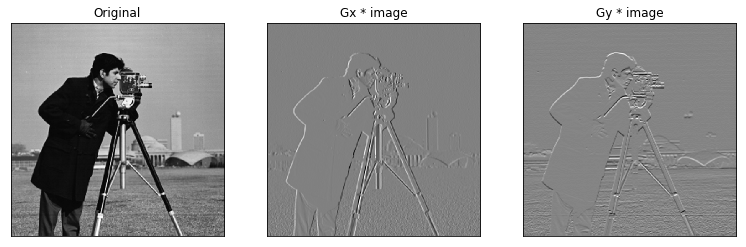

In [9]:
# Perform the convolutions
imx = scipy.signal.convolve2d(im, Gxflip, mode='valid')
imy = scipy.signal.convolve2d(im, Gyflip, mode='valid')
# Plot the original image and the two outputs
plt.figure(figsize=(13,13))
plt.subplot(1,3,1)
disp_image(im)
plt.title('Original')
plt.subplot(1,3,2)
disp_image(imx)
plt.title('Gx * image')
plt.subplot(1,3,3)
disp_image(imy)
plt.title('Gy * image')

In [10]:
print("Input shape = " + str(im.shape))
print("Output shape = " + str(imx.shape))

Input shape = (512, 512)
Output shape = (510, 510)



While the filters above are sensitive to edges, we can also create filters that are senstive to the average value in some area. For example, the uniform kernel G_unif below averages the values in some region of (kx,ky) pixels. The Gaussian kernel also performs an averaging, but weights the pixels at the center of the kernel more.

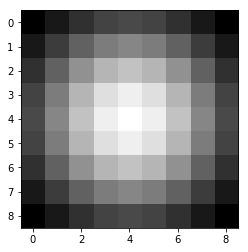

In [11]:
def gauss_kernel(nx,ny,sig):
    """
    Creates a Gaussian kernel of size (nx,ny) with std deviation sig
    """
    dxsq = (np.arange(nx)-(nx-1)/2)**2
    dysq = (np.arange(ny)-(ny-1)/2)**2
    dsq = dxsq[:,None] + dysq[None,:]
    G = np.exp(-0.5*dsq/(sig**2))
    G = G / np.sum(G)
    return G
# Create a uniform kernel
kx = 9
ky = 9
sig = 3
G_unif = np.ones((kx,ky))/(kx*ky)
# Create a Gaussian kernel
G_gauss = gauss_kernel(kx,ky,sig)
plt.imshow(G_gauss,interpolation='None',cmap='gray')

Text(0.5,1,'Gaussian kernel')

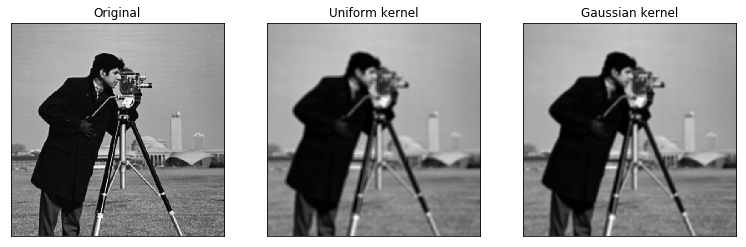

In [12]:
# Peform the convolution
Gunif_flip = np.fliplr(np.flipud(G_unif))
Ggauss_flip = np.fliplr(np.flipud(G_gauss))
im_unif = scipy.signal.convolve2d(im, Gunif_flip, mode='valid')
im_gauss = scipy.signal.convolve2d(im, Ggauss_flip, mode='valid')
# Plot the original image and the two outputs
plt.figure(figsize=(13,13))
plt.subplot(1,3,1)
disp_image(im)
plt.title('Original')
plt.subplot(1,3,2)
disp_image(im_unif)
plt.title('Uniform kernel')
plt.subplot(1,3,3)
disp_image(im_gauss)
plt.title('Gaussian kernel')

## Implementing a Convolutional Layer in Keras

We now show how to implement a convolutional layer in Keras. Typically, in Keras, images are represented as 4- th order tensors with dimensions (batch_size,height,width,nchannels), where batch_size is the number of images in a batch, (height,width) is the images size per channel and nchannels is the number of image channels. For BW images, there is only one channel. We first reshape the image to this format.

In [13]:
nrow, ncol = im.shape
nimage = 1         # number of images in batch
nchan_in = 1       # number of input channels.  1 since it is BW
input_shape = (nrow,ncol,nchan_in)  # input shape of 1 image
batch_shape = (nimage,nrow,ncol,nchan_in)  # shape of image batch
x = im.reshape(batch_shape)

In [36]:
import keras
from keras.models import Model, Sequential, Input
from keras.layers import Conv2D
import keras.backend as K

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [37]:
K.clear_session()
model = Sequential()
kernel_size = Gx.shape
nchan_out = 2
model.add(Conv2D(input_shape = input_shape, filters=nchan_out,kernel_size=kernel_size, name='cov2d'))

NameError: name 'K' is not defined

In [38]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
layer = model.get_layer('conv2d')
W, b = layer.get_weights()
print("W shape = " + str(W.shape))
print("b shape = " + str(b.shape))

In [ ]:
layer = model.get_layer('conv2d')
W, b = layer.get_weights()
print("W shape = " + str(W.shape))
print("b shape = " + str(b.shape))